# Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning. The cleansing of this dataset will be a great start for you to further play with this Kaggle Competition if you have more interest and time.

This step-by-step mini project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [2]:
train = pd.read_csv('train_2017.csv')
properties = pd.read_csv('properties_2017.csv', low_memory=False)

In [3]:
train.shape

(77613, 3)

In [4]:
train.head(3)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01


In [5]:
properties.shape

(2985217, 58)

In [6]:
properties.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN


In [7]:
properties.columns.values

array(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt',
       'yardbuildingsqft17'

#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [8]:
df_train = pd.merge(train,properties,how='left')
df_train.shape

(77613, 60)

In [9]:
df_train.drop(['parcelid','transactiondate'], axis=1,inplace=True)
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.025595,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,0.055619,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,0.005383,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,-0.103410,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,0.006940,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [10]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['missing_count', 'Percent'])
missing_df.sort_values(by='missing_count',ascending=False, inplace=True)
missing_df

,missing_count,Percent
buildingclasstypeid,77598,0.999807
finishedsquarefeet13,77571,0.999459
basementsqft,77563,0.999356
storytypeid,77563,0.999356
yardbuildingsqft26,77543,0.999098
fireplaceflag,77441,0.997784
architecturalstyletypeid,77406,0.997333
typeconstructiontypeid,77390,0.997127
finishedsquarefeet6,77227,0.995027
pooltypeid10,77148,0.994009


#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

<img src="missing_value_barplot.png" alt="Drawing" style="width: 600px;"/>

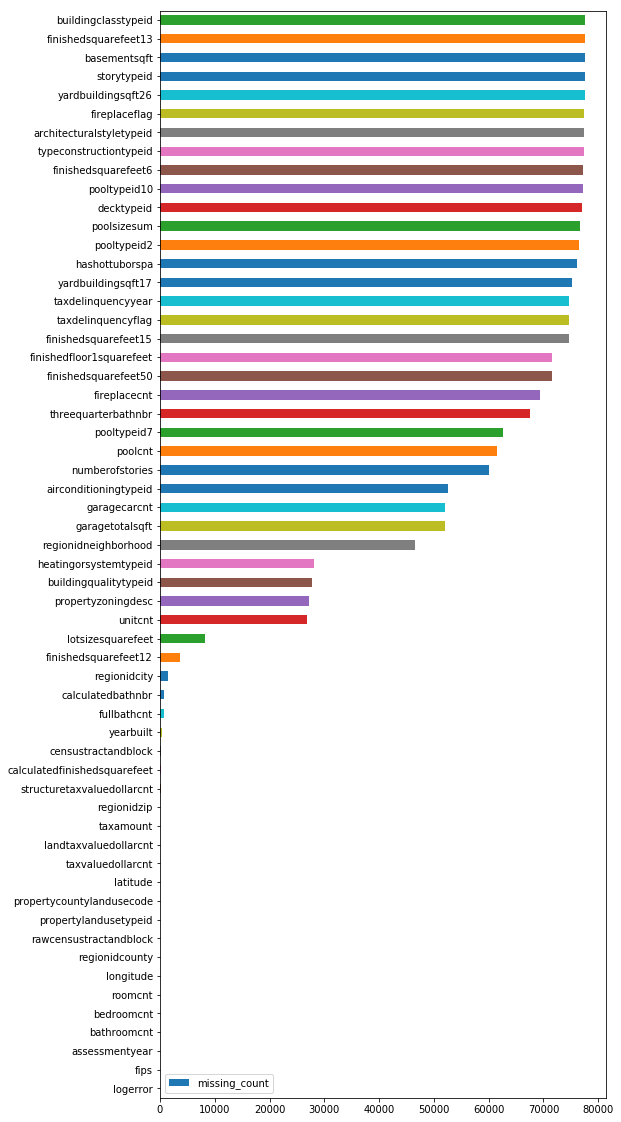

In [12]:
_ = missing_df.plot.barh(y='missing_count',figsize=(8,20))


#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

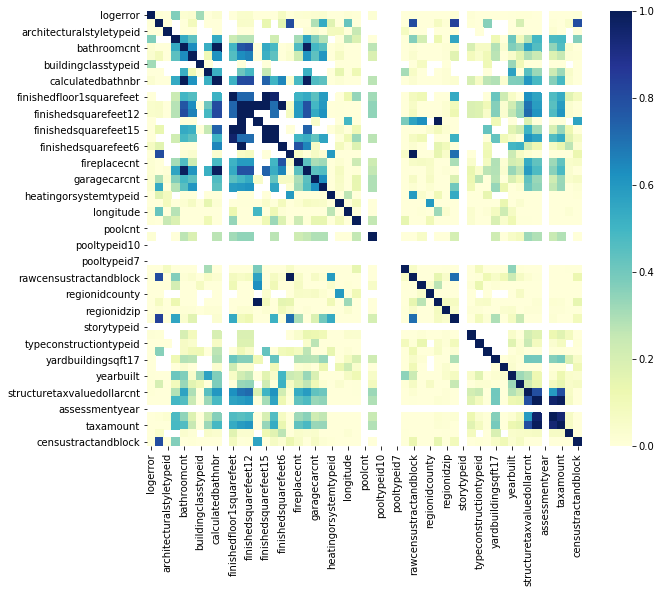

In [11]:
# plt.matshow(df_train.corr())

# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap="YlGnBu",vmin=0, vmax=1,square=True)

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [12]:
# 'bathroomcnt'-- 'calculatedbathnbr'
# 'finishedsquarefeet12' --  'finishedsquarefeet15','finishedsquarefeet13','finishedsquarefeet6','finishedsquarefeet50'
# 'poolcnt' -- 'pooltypeid7','pooltypeid2','pooltypid10'
dropcols = ['calculatedbathnbr','finishedsquarefeet15', 'finishedsquarefeet13','finishedsquarefeet6',
          'finishedsquarefeet50', 'pooltypeid7','pooltypeid2','pooltypeid10']

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [13]:
df_train['hashottuborspa'].isnull().sum()

76074

In [14]:
df_train['hashottuborspa'] = df_train['hashottuborspa'].fillna('None')

In [15]:
df_train['hashottuborspa'].isnull().sum()

0

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [16]:
df_train[['pooltypeid7','poolcnt','hashottuborspa']].head()

,pooltypeid7,poolcnt,hashottuborspa
0,NaN,NaN,None
1,NaN,NaN,None
2,1.0,1.0,None
3,1.0,1.0,None
4,1.0,1.0,None


In [17]:
# df.loc[selection criteria, columns I want] = value
df_train.loc[df_train['pooltypeid7'].isnull(),'poolcnt'] = 'None'
df_train.loc[df_train['pooltypeid7'].isnull(),'hashottuborspa'] = 'None'

(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [18]:
df_train['taxdelinquencyflag'] = df_train['taxdelinquencyflag'].fillna('N')

In [19]:
df_train['taxdelinquencyflag'].value_counts()

N    74713
Y     2900
Name: taxdelinquencyflag, dtype: int64

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [22]:
df_train[['garagecarcnt','garagetotalsqft']].head()

,garagecarcnt,garagetotalsqft
0,2.0,633.0
1,1.0,0.0
2,2.0,440.0
3,NaN,NaN
4,NaN,NaN


In [23]:
df_train.loc[df_train['garagecarcnt'].isnull(),'garagetotalsqft'] = 0
df_train['garagetotalsqft'].head()

0    633.0
1      0.0
2    440.0
3      0.0
4      0.0
Name: garagetotalsqft, dtype: float64

#### 7. **There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [26]:
df_train.loc[df_train['poolcnt'] == 1,'poolsizesum'] = np.median

In [27]:
df_train[['poolsizesum','poolcnt']].head()

,poolsizesum,poolcnt
0,NaN,None
1,NaN,None
2,<function median at 0x105050620>,1
3,<function median at 0x105050620>,1
4,<function median at 0x105050620>,1


#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [28]:
df_train[['fireplaceflag','fireplacecnt']].head()

,fireplaceflag,fireplacecnt
0,NaN,NaN
1,NaN,1.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [34]:
df_train['fireplaceflag'].fillna('No')
df_train.loc[df_train['fireplacecnt'] > 0,'fireplaceflag'] = 'Yes'

In [38]:
df_train['fireplacecnt'].fillna(0)

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        1.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       1.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       1.0
22       0.0
23       0.0
24       0.0
25       0.0
26       2.0
27       0.0
28       0.0
29       0.0
        ... 
77583    0.0
77584    0.0
77585    0.0
77586    0.0
77587    0.0
77588    0.0
77589    0.0
77590    0.0
77591    0.0
77592    0.0
77593    0.0
77594    0.0
77595    0.0
77596    0.0
77597    0.0
77598    0.0
77599    0.0
77600    0.0
77601    0.0
77602    0.0
77603    0.0
77604    0.0
77605    0.0
77606    0.0
77607    0.0
77608    0.0
77609    0.0
77610    1.0
77611    0.0
77612    0.0
Name: fireplacecnt, Length: 77613, dtype: float64

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [39]:
df_train['airconditioningtypeid'] = df_train['airconditioningtypeid'].fillna(1.0)

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [40]:
df_train['heatingorsystemtypeid'] = df_train['heatingorsystemtypeid'].fillna(2.0)

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [41]:
missing_df[missing_df['Percent'] > 0.97]

,missing_count,Percent
buildingclasstypeid,77598,0.999807
finishedsquarefeet13,77571,0.999459
basementsqft,77563,0.999356
storytypeid,77563,0.999356
yardbuildingsqft26,77543,0.999098
fireplaceflag,77441,0.997784
architecturalstyletypeid,77406,0.997333
typeconstructiontypeid,77390,0.997127
finishedsquarefeet6,77227,0.995027
pooltypeid10,77148,0.994009


In [42]:
dropcols = ['calculatedbathnbr','finishedsquarefeet15', 'finishedsquarefeet13','finishedsquarefeet6',
          'finishedsquarefeet50', 'pooltypeid7','pooltypeid2','pooltypeid10']

In [43]:
dropcols.extend(['buildingclasstypeid','basementsqft','storytypeid','yardbuildingsqft26','fireplaceflag',
                 'architecturalstyletypeid','typeconstructiontypeid','decktypeid','poolsizesum','hashottuborspa'])


In [44]:
df_train.drop(dropcols, axis=1, inplace=True)

In [45]:
df_train.sample(3)

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
15279,0.134464,1.0,3.0,2.0,8.0,NaN,1247.0,1247.0,6037.0,NaN,...,1980.0,NaN,164442.0,336547.0,2016.0,172105.0,4139.31,N,NaN,6.037113e+13
11046,-0.069501,1.0,2.5,3.0,NaN,NaN,1846.0,1846.0,6059.0,NaN,...,1980.0,NaN,189281.0,536606.0,2016.0,347325.0,5579.96,N,NaN,6.059053e+13
46998,-0.033316,1.0,1.0,3.0,4.0,NaN,1210.0,1210.0,6037.0,NaN,...,1952.0,NaN,111642.0,332567.0,2016.0,220925.0,4186.39,N,NaN,6.037571e+13


In [47]:
df_train.columns.values

array(['logerror', 'airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock'], dtype=object)

#### 11. We can also use some machine learning algorithm to fill the missing data. (you can skip this if you feel so difficult)
In this dataset, there's quite a few variables which are probably dependant on longtitude and latitude data. It is reasonable to fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information).

You don't need to understand the following code, just consider this as a function you can use directly. The following code comes from the link:
https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

In [49]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Works on categorical feature
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

### Example: 
### If you want to impute buildingqualitytypeid with geological information:
"""
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )
"""

## Works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return

**Find out some features you can use this knn to fill the missing data, and use the above funtion to impute them**

In [62]:
df_train[['regionidcity', 'regionidcounty','regionidneighborhood', 'regionidzip']].isnull().sum()

regionidcity             1506
regionidcounty             34
regionidneighborhood    46639
regionidzip                84
dtype: int64

In [67]:
df_train['regionidzip']

0        96978.0
1        97099.0
2        97078.0
3        96330.0
4        96451.0
5        97091.0
6        96293.0
7        96325.0
8        96173.0
9        96047.0
10       96374.0
11       96956.0
12       96966.0
13       97051.0
14       97008.0
15       97107.0
16       96962.0
17       96275.0
18       96003.0
19       96962.0
20       96220.0
21       96971.0
22       96954.0
23       96018.0
24       96120.0
25       96237.0
26       96957.0
27       96352.0
28       96008.0
29       97005.0
          ...   
77583    96221.0
77584    96368.0
77585    96124.0
77586    96216.0
77587    96412.0
77588    96508.0
77589    96506.0
77590    96124.0
77591    96100.0
77592    96356.0
77593    96124.0
77594    96204.0
77595    96123.0
77596    96208.0
77597    96020.0
77598    96015.0
77599    96023.0
77600    97319.0
77601    96338.0
77602    96320.0
77603    96508.0
77604    96123.0
77605    96424.0
77606    96342.0
77607    96204.0
77608    96415.0
77609    96284.0
77610    97116

In [69]:

fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidzip', fraction = 0.15, n_neighbors = 1 )

fitting
the shape of active features:  (383,)
predicting


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').